# Fingerprinting Categorical Data
## Nearest Neighbours Approach

In this notebook we analyse the behaviour of the fingerprinting technique for categorical data. The approach examines the neighbourhood of the observed item to decide how to mark it. The technique works for numerical type of data as well - in this setting the AK scheme is used. In the settings where the dataset contains a mix of data types, the techniques are chosen dynamically, based on the value chosen for marking.  

In [1]:
# This is important for module import 
import sys, os
if 'C:/Users/tsarcevic/PycharmProjects/fingerprinting-toolbox/' not in sys.path:
    sys.path.append('C:/Users/tsarcevic/PycharmProjects/fingerprinting-toolbox/')
os.chdir('../')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from schemes.categorical_neighbourhood.categorical_neighbourhood import CategoricalNeighbourhood
from utils import *

Let us take a look at our data.

In [5]:
dataset_name = "german_credit_sample"
dataset, primary_key = import_dataset(dataset_name)
dataset

Dataset: datasets/german_credit_sample.csv


,Id,checking_account,duration,credit_hist,purpose,credit_amount,savings,employment_since,installment_rate,sex_status,debtors,residence_since
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2
2,2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3
3,3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4
4,4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4
5,5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4
6,6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4
7,7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2
8,8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4
9,9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2


We embedd the fingerprint into our dataset. The fingerprint will be 32 bits long, and it is embedded in every third rown in the dataset on average. The secret key is known only to the owner of the dataset and without it is impossible to recreate the algoritm.

In [6]:
scheme = CategoricalNeighbourhood(gamma=3, xi=2, fingerprint_bit_length=32, number_of_buyers=10, secret_key=333, k=5)
scheme.insertion(dataset_name=dataset_name, buyer_id=0)

Start the insertion algorithm of a scheme for fingerprinting categorical data (neighbourhood) ...
	gamma: 3
	xi: 2
Dataset: datasets/german_credit_sample.csv

Generated fingerprint for buyer 0: 01001110011110110000100110110000
Inserting the fingerprint...

Training balltrees in: 0.02 sec.
Size of a neighbourhood: 10 instead of 5
	Neighbours: [13, 14, 29, 22, 10, 3, 9, 11, 25, 20]
Size of a neighbourhood: 8 instead of 5
	Neighbours: [0, 24, 2, 8, 26, 20, 5, 19]
Size of a neighbourhood: 12 instead of 5
	Neighbours: [29, 11, 0, 3, 13, 14, 15, 4, 21, 25, 26, 22]
Fingerprint inserted.
	fingerprinted dataset written to: schemes/categorical_neighbourhood/fingerprinted_datasets/german_credit_sample_3_2_0.csv
Time: 0 sec.


c:\users\tsarcevic\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\tsarcevic\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\tsarcevic\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\tsarcevic\appdata\local\programs\python\python37-32\

True

The fingerprint is inserted in the dataset. We can now extract the differences to see the effect of the fingerprint. 
The rows with differences are extracted from original and fingerprinted dataset, and put one after another so that we can observe the differences (marks) more easily.

It is important to note that the fingerprint marks are not only the marks where the value changes, but also the "invisible" ones where the algorithm chose not to change a value at specific locations - this is important for the extraction.

In [7]:
fingerprinted_data, primary_key = import_fingerprinted_dataset("categorical_neighbourhood", dataset_name, [3, 2], 0)
diff = dataset[~dataset.isin(fingerprinted_data)].dropna(how="all").index

combo = pd.concat([dataset.loc[diff], fingerprinted_data.loc[diff]])
combo = combo.sort_index()
combo

Dataset: schemes/categorical_neighbourhood/fingerprinted_datasets/german_credit_sample_3_2_0.csv


,Id,checking_account,duration,credit_hist,purpose,credit_amount,savings,employment_since,installment_rate,sex_status,debtors,residence_since
2,2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3
2,2,A14,13,A34,A46,2096,A61,A74,2,A93,A101,3
4,4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4
4,4,A11,24,A33,A40,4870,A61,A73,3,A93,A103,4
16,16,A14,24,A34,A43,2424,A65,A75,4,A93,A101,4
16,16,A14,24,A34,A43,2424,A65,A75,4,A94,A101,4
17,17,A11,30,A30,A49,8072,A65,A72,2,A93,A101,3
17,17,A11,30,A30,A49,8072,A61,A72,2,A93,A101,3
24,24,A14,10,A34,A42,2069,A65,A73,2,A94,A101,1
24,24,A14,10,A34,A42,2069,A65,A73,0,A94,A101,1


There are 5 differences in total - 2 between numerical values, 3 between categorical. Let us take for example the row with id=4 and examine how the mark value was chosen (A101->A103) in attribute "debtors". For now our algorithm works such that for neighbourhood search it considers all but last three columns. The insertion algorithm looks at the values of row id=4 and searches for 5 neighbours. In this case many of them have the same distance, so k is increased, in this case to 10. The algorithm does it's magic of calcualting the neighbourhood; we obtain the neighbourhood: rows 13, 14, 29, 22, 10, 3, 9, 11, 25, 20. Next thing the algorithm does is count the frequencies of our target values in the neihgbourhood. Here we plot the frequencies:

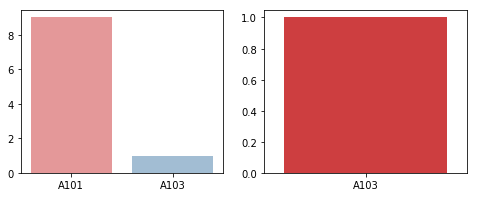

In [8]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
counts = dataset["debtors"][[13,14,29,22,10,3,9,11,25,20]].value_counts()
sns.barplot(counts.index, counts.values, alpha=.5, palette="Set1", ax=ax[0])

counts = counts.drop("A101")
sns.barplot(counts.index, counts.values, alpha=.95, palette="Set1", ax=ax[1])

The first plot represents the taget values "deptors" in the neighbourhood. We see that value A101 occurs 9 times and the value A103 1 time. Since the value A101 is the original value, we force the change as a mark and obtain only value A103 (the plot on the right). This value is chosen as a mark since it's the only remaining value. 

Let us see other marked categorical values. The next one is in the row with id=16 and the change occurs for attribute sex_status from value A93 to A94. The process of marking here was the same as in the previous example. The neighbourhood is calculated and frequencies of the target value obtained:

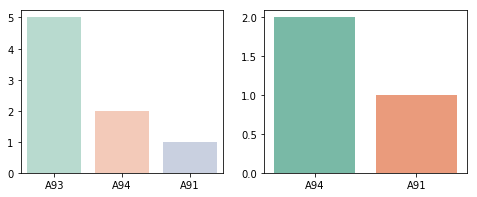

In [9]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
counts = dataset["sex_status"][[0, 24, 2, 8, 26, 20, 5, 19]].value_counts()
sns.barplot(counts.index, counts.values, alpha=.5, palette="Set2", ax=ax[0])

counts = counts.drop("A93")
sns.barplot(counts.index, counts.values, alpha=.95, palette="Set2", ax=ax[1])

The plot on the left shows the frequencies of values of attribute "sex_status" in the neighbourhood: A93 occurs 5 times, A94 2 times and A91 one time (neighbourhood size is increased again; now it's 8). Since the original value is A93, we want to remove it from consideration so we obtain the plot on the right. There are two values to choose from. The algorithm weights it's random choice of mark by it's frequency, therefore A94 has more chance to be chosen as a mark than A91 - indeed it is chosen in this algorithm run.

The remaining example of marking categorical value follows the same steps as shown above. We have a mark in a row 17, attribute savings (A65 -> A61). We obtain the frequencis from the neighbourhood:

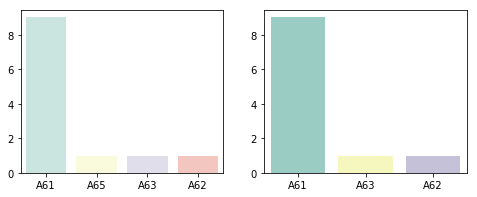

In [10]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
counts = dataset["savings"][[29, 11, 0, 3, 13, 14, 15, 4, 21, 25, 26, 22]].value_counts()
sns.barplot(counts.index,  counts.values, alpha=.5, palette="Set3", ax=ax[0])

counts = counts.drop("A65")
sns.barplot(counts.index,  counts.values, alpha=.95, palette="Set3", ax=ax[1])

Again, the left plot shows all the values appearing in the neighbourhood for attribute savings: A61 9 time, all others, A63, A62 and A65 1 time. We remove the original value, A65 and choose from three remaining values (plot on the right). The value A61 has way more chances to be chosen than the remaining two and the algorithm indeed chooses it as a mark. 

The nature of choosing the most frequent values in the neighbourhood leads us to the assumption that by marking categorical values, the distribution might converge to most frequent values in the dataset. However, looking from the other perspective, the most frequent values are also most likely to be chosen for marking, and therefore forced to change to another, less frequent value (remember that the change of a values is always forced if possible).


We can see how the distribution of values in categorical attributes changes by applying fingerprinting on the data. For this purpose we fingerprint the entire german credit dataset.

In [110]:
scheme = CategoricalNeighbourhood(gamma=1, xi=2, fingerprint_bit_length=32, number_of_buyers=10, secret_key=333, k=10)
scheme.insertion(dataset_name="german_credit", buyer_id=0)

Start the insertion algorithm of a scheme for fingerprinting categorical data (neighbourhood) ...
	gamma: 1
	xi: 2
Dataset: datasets/german_credit.csv

Generated fingerprint for buyer 0: 01001110011110110000100110110000
Inserting the fingerprint...

Training balltrees in: 0.04 sec.
Size of a neighbourhood: 51 instead of 10
	Neighbours: [245, 943, 430, 527, 234, 932, 654, 469, 738, 749, 734, 204, 366, 776, 880, 614, 298, 544, 662, 411, 264, 281, 423, 206, 608, 256, 275, 694, 637, 984, 325, 273, 995, 497, 90, 769, 246, 848, 510, 241, 228, 422, 904, 89, 530, 318, 629, 941, 365, 606, 202]
Size of a neighbourhood: 47 instead of 10
	Neighbours: [316, 227, 322, 650, 814, 460, 840, 587, 988, 853, 392, 457, 501, 927, 454, 805, 341, 878, 359, 899, 368, 522, 380, 396, 655, 874, 510, 260, 143, 434, 148, 286, 432, 364, 229, 338, 993, 998, 919, 552, 624, 930, 696, 777, 239, 944, 848]
Size of a neighbourhood: 12 instead of 10
	Neighbours: [655, 878, 522, 853, 814, 545, 599, 929, 262, 998, 624, 541]
S

	Neighbours: [886, 627, 95, 62, 145, 478, 395, 154, 684, 714, 739, 287, 491, 620, 687, 671, 87, 959, 97, 752, 232, 829, 63, 872, 597, 706]
Size of a neighbourhood: 21 instead of 10
	Neighbours: [974, 345, 698, 196, 276, 546, 185, 57, 486, 256, 371, 20, 52, 426, 753, 883, 891, 474, 318, 238, 357]
Size of a neighbourhood: 12 instead of 10
	Neighbours: [659, 172, 884, 961, 537, 793, 169, 51, 319, 788, 29, 339]
Size of a neighbourhood: 13 instead of 10
	Neighbours: [75, 205, 457, 501, 242, 330, 292, 227, 988, 322, 293, 828, 262]
Size of a neighbourhood: 25 instead of 10
	Neighbours: [135, 592, 451, 679, 708, 134, 80, 269, 742, 69, 625, 386, 115, 92, 833, 807, 712, 836, 928, 987, 904, 448, 912, 629, 873]
Size of a neighbourhood: 19 instead of 10
	Neighbours: [216, 663, 412, 827, 387, 452, 235, 63, 485, 597, 620, 867, 986, 464, 131, 703, 993, 890, 745]
Size of a neighbourhood: 22 instead of 10
	Neighbours: [787, 716, 803, 715, 625, 450, 406, 269, 791, 283, 16, 266, 149, 928, 567, 778, 994, 1

	Neighbours: [223, 384, 423, 830, 253, 606, 670, 331, 403, 932, 941, 916, 484, 628, 183, 136, 860, 275, 102, 256, 159, 160, 427, 255, 210, 642, 357, 42, 910, 597, 671, 290, 478, 430, 97, 190, 245, 599, 488, 684, 674, 370, 861, 213, 281, 202, 468, 841, 872, 243, 929, 298, 266]
Size of a neighbourhood: 14 instead of 10
	Neighbours: [837, 842, 582, 767, 633, 724, 462, 372, 679, 386, 249, 458, 873, 570]
Size of a neighbourhood: 38 instead of 10
	Neighbours: [787, 851, 939, 450, 715, 406, 712, 394, 366, 411, 415, 654, 772, 999, 778, 860, 748, 283, 947, 266, 549, 791, 902, 53, 78, 128, 159, 716, 115, 803, 807, 879, 16, 894, 210, 214, 473, 990]
Size of a neighbourhood: 18 instead of 10
	Neighbours: [555, 849, 529, 481, 525, 416, 39, 741, 461, 383, 608, 273, 709, 799, 810, 806, 559, 581]
Size of a neighbourhood: 28 instead of 10
	Neighbours: [328, 928, 625, 269, 214, 265, 152, 688, 534, 994, 568, 742, 791, 997, 786, 329, 877, 716, 718, 833, 46, 803, 493, 574, 949, 230, 912, 19]
Size of a neigh

Size of a neighbourhood: 29 instead of 10
	Neighbours: [462, 837, 359, 623, 367, 475, 285, 369, 341, 504, 747, 585, 582, 124, 831, 11, 372, 155, 869, 761, 391, 218, 862, 944, 896, 926, 350, 458, 922]
Size of a neighbourhood: 30 instead of 10
	Neighbours: [858, 11, 500, 504, 954, 996, 14, 983, 593, 601, 414, 441, 155, 869, 338, 120, 569, 630, 762, 896, 985, 922, 521, 471, 885, 914, 790, 82, 722, 704]
Size of a neighbourhood: 65 instead of 10
	Neighbours: [265, 329, 641, 997, 410, 877, 101, 328, 192, 428, 768, 525, 52, 7, 555, 378, 261, 76, 12, 142, 107, 453, 152, 84, 708, 709, 273, 178, 694, 692, 269, 568, 361, 625, 786, 656, 459, 39, 440, 486, 368, 730, 371, 426, 98, 891, 833, 46, 493, 699, 928, 931, 937, 949, 19, 228, 230, 904, 51, 912, 127, 530, 989, 887, 957]
Size of a neighbourhood: 14 instead of 10
	Neighbours: [559, 957, 745, 35, 355, 911, 516, 184, 422, 580, 98, 503, 73, 346]
Size of a neighbourhood: 23 instead of 10
	Neighbours: [496, 95, 973, 525, 7, 378, 112, 714, 923, 462, 1

Size of a neighbourhood: 53 instead of 10
	Neighbours: [567, 772, 781, 415, 280, 860, 787, 149, 715, 266, 676, 888, 654, 544, 509, 204, 838, 206, 209, 183, 712, 136, 437, 791, 366, 352, 283, 939, 851, 406, 902, 450, 411, 264, 371, 246, 426, 490, 891, 90, 769, 716, 160, 115, 453, 427, 803, 807, 16, 91, 214, 933, 200]
Size of a neighbourhood: 40 instead of 10
	Neighbours: [437, 544, 94, 204, 264, 913, 932, 871, 978, 888, 672, 941, 662, 440, 823, 484, 206, 164, 860, 370, 183, 179, 943, 778, 712, 882, 994, 854, 90, 769, 246, 160, 427, 567, 149, 115, 807, 629, 266, 904]
Size of a neighbourhood: 58 instead of 10
	Neighbours: [597, 709, 39, 63, 741, 42, 355, 25, 581, 559, 281, 260, 841, 308, 651, 442, 929, 298, 756, 434, 626, 422, 932, 969, 893, 301, 189, 1, 28, 606, 273, 173, 275, 447, 137, 835, 256, 713, 480, 98, 255, 89, 225, 217, 222, 127, 941, 957, 915, 248, 543, 615, 658, 827, 887, 192, 181, 60]
Size of a neighbourhood: 41 instead of 10
	Neighbours: [56, 421, 236, 473, 381, 748, 947, 13

Size of a neighbourhood: 24 instead of 10
	Neighbours: [877, 904, 428, 328, 52, 453, 574, 265, 694, 269, 625, 786, 329, 459, 440, 486, 371, 426, 891, 46, 928, 19, 228, 949]
Fingerprint inserted.
	fingerprinted dataset written to: schemes/categorical_neighbourhood/fingerprinted_datasets/german_credit_1_2_0.csv
Time: 2 sec.


c:\users\tsarcevic\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\tsarcevic\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\tsarcevic\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\tsarcevic\appdata\local\programs\python\python37-32\

True

In [113]:
fingerprinted_data, primary_key = import_fingerprinted_dataset("categorical_neighbourhood", "german_credit", [1, 2], 0)

Dataset: schemes/categorical_neighbourhood/fingerprinted_datasets/german_credit_1_2_0.csv


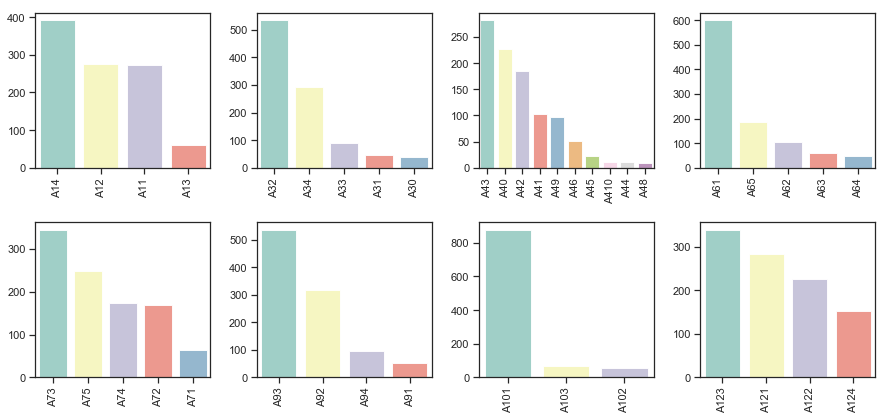

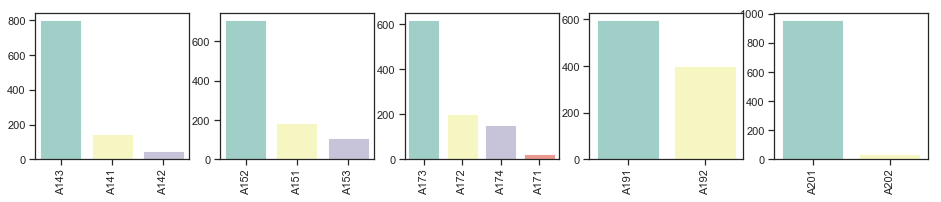

In [114]:
sns.set(style="ticks")
fig1, ax1 = plt.subplots(2, 4, figsize=(12.5,6))
fig2, ax2 = plt.subplots(1, 5, figsize=(16,2.7))
i, j, plotfig1 = 0, 0, True
for categorical_attribute in fingerprinted_data.select_dtypes(include='object').columns:
    counts = fingerprinted_data[categorical_attribute][primary_key].value_counts()
    if plotfig1:
        chart = sns.barplot(counts.index, counts.values, alpha=.9, palette="Set3", ax=ax1[i][j])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        if j < 3: 
            j += 1
        else: 
            i += 1; j = 0
        if i == 2: 
            plotfig1 = False
            i, j = 0, 0 
    else:
        chart = sns.barplot(counts.index, counts.values, alpha=.9, palette="Set3", ax=ax2[i])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        i += 1 
fig1.tight_layout()

And the original distribution looked like this:

Dataset: datasets/german_credit.csv


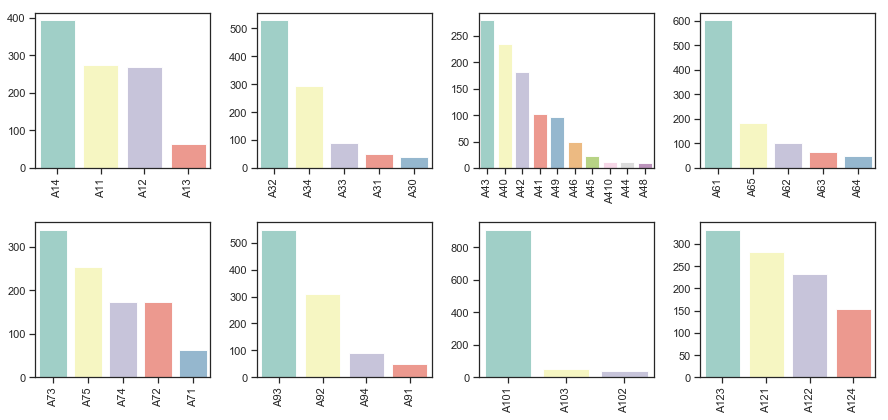

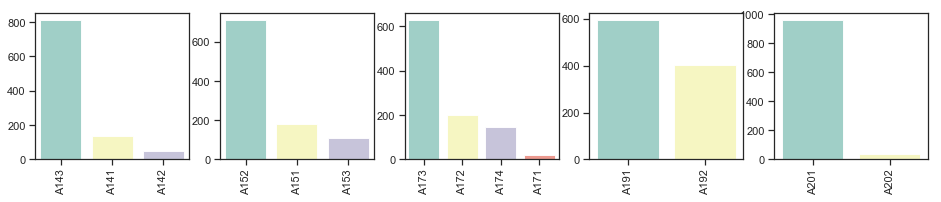

In [109]:
original_data, primary_key = import_dataset("german_credit")

sns.set(style="ticks")
fig1, ax1 = plt.subplots(2, 4, figsize=(12.5,6))
fig2, ax2 = plt.subplots(1, 5, figsize=(16,2.7))
i, j, plotfig1 = 0, 0, True
for categorical_attribute in original_data.select_dtypes(include='object').columns:
    counts = original_data[categorical_attribute][primary_key].value_counts()
    if plotfig1:
        chart = sns.barplot(counts.index, counts.values, alpha=.9, palette="Set3", ax=ax1[i][j])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        if j < 3: 
            j += 1
        else: 
            i += 1; j = 0
        if i == 2: 
            plotfig1 = False
            i, j = 0, 0 
    else:
        chart = sns.barplot(counts.index, counts.values, alpha=.9, palette="Set3", ax=ax2[i])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        i += 1 
fig1.tight_layout()